# Observations and Insights

### Imports and Read Files

#### Imports 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


#### Read Files

In [2]:

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


### Table's of given Data

#### Mouse Metadata Table

In [3]:
# Table Outcome
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


#### Study Results Table

In [4]:
# Table Outcome
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


#### Merged 'Mouse Metadata' & 'Study Results' Table

In [5]:
# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


#### Data information on given data

In [6]:
# Printing out the columns of 'merge_df' data frame
mm = list(mouse_metadata)
print(f"Data from 'mouse_metadata'...{mm}")
print("These values do not change... DO NOT TOUCH OR CHANGE VALUES")

print(" - " * 10)
sr = list(study_results)
print(f"Data from 'study_results'...{sr}")
print("These values do change... APPLY ARGUEMENTS TO VALUES")


Data from 'mouse_metadata'...['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
These values do not change... DO NOT TOUCH OR CHANGE VALUES
 -  -  -  -  -  -  -  -  -  - 
Data from 'study_results'...['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites']
These values do change... APPLY ARGUEMENTS TO VALUES


### Amount of Mice in the data

In [7]:
mice_count = merge_df

# Add Column to 'mice_count' since we need two 'Mouse ID'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
mice_count.loc[:, "Total of Studies"] = merge_df["Mouse ID"]

# Fource 'Mouse ID' as index and keep column of 'Total of Mice' while we count the amount of 'Total of Mices' by its 'Mouse ID'
# if it has a same 'Mouse ID', it will count into that index...
mice_count = mice_count.groupby(['Mouse ID'], as_index=False).agg({'Total of Studies': 'count'})

# Get the value of how many mices there are by counting 'Mouse ID'
mice_number = mice_count["Mouse ID"].count()
print(f"There are {mice_number} mice in the data.")

There are 249 mice in the data.


### Clean Merged Table

In [8]:
mice_agg = merge_df

# Add Column to 'mice_count' since we need two 'Mouse ID'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
mice_agg.loc[:, "Total of Mice"] = merge_df["Mouse ID"]

# Fource 'Mouse ID' as index and keep column of 'Total of Mice' while we count the amount of 'Total of Mices' by its 'Mouse ID'
# if it has a same 'Mouse ID', it will count into that index...
mice_agg = mice_agg.groupby(['Mouse ID','Drug Regimen', 'Sex', 'Age_months','Weight (g)'], as_index=False).agg({
    'Total of Studies': 'count',
    'Timepoint':'sum',
    'Tumor Volume (mm3)':'mean',
    'Metastatic Sites':'sum'})

# Convert 'Age' into 'Total Count'
mice_agg = mice_agg.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Average (mm3)"})
mice_agg = mice_agg.rename(columns={"Timepoint": "Timepoint Total"})
mice_agg = mice_agg.rename(columns={"Metastatic Sites": "Metastatic Sites Total"})

mice_agg

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total
0,a203,Infubinol,Female,20,23,10,225,56.312708,11
1,a251,Infubinol,Female,21,25,10,225,55.237095,8
2,a262,Placebo,Female,17,29,10,225,58.611631,23
3,a275,Ceftamin,Female,20,28,10,225,52.770965,12
4,a366,Stelasyn,Female,16,29,7,105,54.639906,1
...,...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,3,15,46.942214,0
245,z578,Ramicane,Male,11,16,10,225,38.411510,0
246,z581,Infubinol,Female,24,25,10,225,53.979584,20
247,z795,Naftisol,Female,13,29,10,225,54.880317,14


### Input Mouse ID and Specific Mouse Table Output

#### Input Code

In [9]:
# Example of what we want by having user input the value of the mouse
mouse_id_grouped_by = mice_agg.set_index('Mouse ID')
mouse_id_grouped_by.loc[['a203']]


,Drug Regimen,Sex,Age_months,Weight (g),Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,10,225,56.312708,11


#### Printing index list of mice names ('Mouse ID' values)

In [10]:
# Get the index/rows of the above DataFrame 
# Using tolist() function
print("\nThis is index of DataFrame:\n")
index_list = mouse_id_grouped_by.index.tolist()
print(index_list)


This is index of DataFrame:

['a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', '

In [11]:
# User Input on what mice they want...
print("Here is a list of mouse id's")
print(" - " * 10)
print("'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm133', 'm269', 'm331', 'm546', 'm550', 'm601', 'm650', 'm756', 'm957', 'n304', 'n364', 'n482', 'n630', 'n671', 'n678', 'n763', 'n923', 'n967', 'o287', 'o302', 'o331', 'o523', 'o562', 'o725', 'o795', 'o809', 'o813', 'o848', 'o926', 'o973', 'p136', 'p189', 'p310', 'p387', 'p438', 'p981', 'q119', 'q132', 'q483', 'q511', 'q582', 'q597', 'q610', 'q633', 'q787', 'r107', 'r157', 'r554', 'r604', 'r701', 'r811', 'r850', 'r921', 'r944', 's121', 's141', 's152', 's166', 's185', 's187', 's337', 's508', 's565', 's619', 's710', 't198', 't451', 't565', 't573', 't718', 't724', 't994', 'u149', 'u153', 'u196', 'u327', 'u364', 'u946', 'v199', 'v289', 'v295', 'v339', 'v409', 'v603', 'v719', 'v764', 'v766', 'v835', 'v923', 'v989', 'v991', 'w140', 'w150', 'w151', 'w167', 'w193', 'w350', 'w422', 'w540', 'w575', 'w584', 'w678', 'w697', 'w746', 'w914', 'x111', 'x209', 'x226', 'x264', 'x336', 'x401', 'x402', 'x581', 'x613', 'x773', 'x822', 'x930', 'y163', 'y260', 'y449', 'y478', 'y601', 'y769', 'y793', 'y865', 'z234', 'z314', 'z435', 'z578', 'z581', 'z795', 'z969'")
print(" - " * 10)
mice_input = input("What mouse would you like to search for? ")
print(f"The mouse you looked for is {mice_input}")

mouse_id_grouped_by = mice_agg.set_index('Mouse ID')
mouse_selected = mouse_id_grouped_by.loc[[mice_input]]
mouse_selected


Here is a list of mouse id's
 -  -  -  -  -  -  -  -  -  - 
'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a411', 'a444', 'a457', 'a492', 'a520', 'a577', 'a644', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b128', 'b313', 'b447', 'b487', 'b559', 'b742', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302', 'c326', 'c402', 'c458', 'c559', 'c580', 'c757', 'c758', 'c766', 'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd251', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584', 'e662', 'f129', 'f234', 'f278', 'f345', 'f394', 'f436', 'f545', 'f932', 'f966', 'f993', 'g107', 'g288', 'g296', 'g316', 'g497', 'g558', 'g570', 'g791', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531', 'i177', 'i334', 'i386', 'i477', 'i557', 'i635', 'i669', 'i738', 'i901', 'j119', 'j235', 'j246', 'j296', 'j365', 'j755', 'j913', 'j984', 'j989', 'k210', 'k382', 'k403', 'k483', 'k510', 'k603', 'k754', 'k804', 'k862', 'k894', 'l215', 'l264', 'l471', 'l490', 'l509', 'l558', 'l661', 'l700', 'l725', 'l733', 'l872', 'l897', 'm13

,Drug Regimen,Sex,Age_months,Weight (g),Total of Studies,Timepoint Total,Tumor Volume Average (mm3),Metastatic Sites Total
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,10,225,56.312708,11


In [12]:
mouse_selected_number = mouse_selected["Total of Studies"][0]
print(f"There are {mouse_selected_number} mice studies for 'Mouse ID': '{mice_input}'")

There are 10 mice studies for 'Mouse ID': 'a203'


# Summary Statistics

### Testing Table's and Arguements

#### Variance Test Table

In [13]:
# make copy of 'merge_df' with col. 'Mouse ID' and 'Tumor Volume (mm3)'
var_test = merge_df[["Mouse ID","Tumor Volume (mm3)"]]

# force 'Mouse ID' as index while applying variance as arguement
var_test = var_test.groupby(["Mouse ID"]).var()

# print dataframe
var_test

# var_numpy = np.var(temperatures,ddof = 0)
# print(f"The population variance using the NumPy module is {var_numpy}")

,Tumor Volume (mm3)
Mouse ID,
a203,50.407041
a251,51.740730
a262,84.759928
a275,36.322924
a366,38.415384
...,...
z435,3.464898
z578,17.969628
z581,29.827123


#### Standard Deviation Test Table

In [14]:
# make copy of 'merge_df' with col. 'Mouse ID' and 'Tumor Volume (mm3)'
std_test = merge_df[["Mouse ID","Tumor Volume (mm3)"]]

# force 'Mouse ID' as index while applying variance as arguement
std_test = std_test.groupby(["Mouse ID"]).std()

# print dataframe
std_test


# sd_numpy = np.std(temperatures,ddof = 0)
# print(f"The population standard deviation using the NumPy module is {sd_numpy}")

,Tumor Volume (mm3)
Mouse ID,
a203,7.099792
a251,7.193103
a262,9.206515
a275,6.026850
a366,6.198015
...,...
z435,1.861424
z578,4.239060
z581,5.461421


### Table of Summary Statistic

#### Creating Table Code

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor = merge_df

# Add Column to 'Tumor Volume Median/Variance/Standard Deviation/SEM' since we need four 'Tumor Volume (mm3)'... one for count and the other is for index
# Also... cannot have two same names... 'Mouse ID' and 'Mouse ID' cannot work together in '.agg' formula
summary_tumor.loc[:, "Tumor Volume Mean"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Median"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Variance"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Standard Deviation"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume SEM"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Min"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Max"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Mode"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume Range"] = merge_df["Tumor Volume (mm3)"]
summary_tumor.loc[:, "Tumor Volume SEM"] = merge_df["Tumor Volume (mm3)"]


# delete Columns
del summary_tumor['Drug Regimen']
del summary_tumor['Sex']
del summary_tumor['Age_months']
del summary_tumor['Weight (g)']
del summary_tumor['Timepoint']
del summary_tumor['Metastatic Sites']
del summary_tumor['Total of Studies']
del summary_tumor['Total of Mice']

summary_tumor


,Mouse ID,Tumor Volume (mm3),Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM,Tumor Volume Min,Tumor Volume Max,Tumor Volume Mode,Tumor Volume Range
0,k403,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,k403,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898,38.825898
2,k403,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271,35.014271
3,k403,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992,34.223992
4,k403,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729,32.997729
...,...,...,...,...,...,...,...,...,...,...,...
1888,z969,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652,63.145652
1889,z969,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013,65.841013
1890,z969,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246,69.176246
1891,z969,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904,70.314904


#### Table outcome of 'Summary Statistic Table'

In [16]:
sum_tumor = summary_tumor.groupby(['Mouse ID'], as_index=False).agg({'Tumor Volume Mean': 'mean', 'Tumor Volume Median':'median','Tumor Volume Variance':'var','Tumor Volume Standard Deviation':'std','Tumor Volume Min':'min','Tumor Volume Max':'max'})
sum_tumor

sum_tumor = summary_tumor.groupby(['Mouse ID'], as_index=False).agg({'Tumor Volume Mean': 'mean', 'Tumor Volume Median':'median','Tumor Volume Variance':'var','Tumor Volume Standard Deviation':'std','Tumor Volume Min':'min','Tumor Volume Max':'max','Tumor Volume SEM':'sem'})
sum_tumor
# Mean: avg

# Median: Middle value 
# Variance: ...
#   ex. 10 values given
#           j = (3+8+6+10+12+9+11+10+12+7)/10 (mean first) --> j = 8.8
#       Then... we take each value minus j
#           3 - j --> 3 - 8.8 = -5.8
#           8 - j --> 8 - 8.8 = -.8
#           ...
#       Then... we square the outcome of each value 
#           (-5.8)^2 = 33.64
#           (-.8)^2 = 0.64
#           ...
#       Then we add up all of the squared values...
#           33.64 + 0.64 + ... = 73.6
#       Then we divide its total by the amount of values we used
#           73.6/10 = 7.36
#       7.36 is our variance in this example 

# Max: maximum val 
# Min: mininum val
# SEM: calculate standard error of the mean 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mouse ID,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Min,Tumor Volume Max,Tumor Volume SEM
0,a203,56.312708,55.983272,50.407041,7.099792,45.000000,67.973419,2.245151
1,a251,55.237095,55.938620,51.740730,7.193103,45.000000,65.525743,2.274659
2,a262,58.611631,58.572588,84.759928,9.206515,45.000000,70.717621,2.911356
3,a275,52.770965,52.044750,36.322924,6.026850,45.000000,62.999356,1.905857
4,a366,54.639906,55.265582,38.415384,6.198015,45.000000,63.440686,2.342629
...,...,...,...,...,...,...,...,...
244,z435,46.942214,47.115980,3.464898,1.861424,45.000000,48.710661,1.074693
245,z578,38.411510,38.160380,17.969628,4.239060,30.638696,45.000000,1.340508
246,z581,53.979584,53.062175,29.827123,5.461421,45.000000,62.754451,1.727053
247,z795,54.880317,55.613879,53.416711,7.308674,45.000000,65.741070,2.311206


# Bar and Pie Charts

### Bar Chart: Total Number of Timepoints (tested mice) (pyplot)

In [17]:
# Prints out the index of 'Drugs Regimen' to put it in our bar chart
list_drugs = mice_agg['Drug Regimen'].value_counts()
list_drugs = list_drugs.index.tolist()
list_drugs

['Zoniferol',
 'Placebo',
 'Capomulin',
 'Propriva',
 'Infubinol',
 'Ketapril',
 'Ceftamin',
 'Ramicane',
 'Naftisol',
 'Stelasyn']

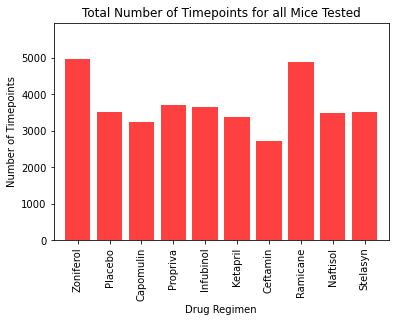

In [18]:
drug_regimen_df = mice_agg.groupby(['Drug Regimen'], as_index=False).agg({
    'Timepoint Total':'sum'})

drug_regimen = drug_regimen_df['Drug Regimen']

# Prints out the index of 'Drugs Regimen' to put it in our bar chart
list_drugs = mice_agg['Drug Regimen'].value_counts()
list_drugs = list_drugs.index.tolist()
list_drugs

# x_axis = [0 1 2 3 4 5 6 7 8 9] ... 0 is Capomulin 1 is Ramicane etc.
x_axis = np.arange(len(drug_regimen))

# # y_axis is the timepoint values from 'drug_regimen_df' which is 0:15600 and 1:21450 
y_axis = drug_regimen_df['Timepoint Total']

plt.bar(x_axis, y_axis, color='r', alpha=0.75, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_drugs, rotation="vertical")

# Sets the x limits of the current chart
# len(x_axis) = 2...then 2 - 0.25 is 1.75  1.75 value is making sure the bar is not far away from center 
plt.xlim(-0.75, len(x_axis)- .25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+1000)


# Give our chart some labels and a tile
plt.title("Total Number of Timepoints for all Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Drugs_Total_Timepoint_pyplot_bar.png")
plt.show()

### Bar Chart: Total Number of Timepoints (tested mice) (pandas)

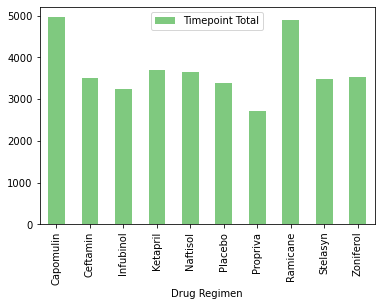

In [19]:
# create a pandas Bar plot
drug_regimen_df.plot(x ='Drug Regimen', y='Timepoint Total', kind='bar', cmap='Accent');

drug_regimen_df

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Drugs_Regimen_pandas_bar.png")
plt.show()


### Pie Chart: Distribution of Female V. Male Mice (pyplot)

#### Table for Gender Sum and Mean

In [20]:
gender_sum_df = mice_agg.groupby(['Sex','Mouse ID'], as_index=False).agg({
    'Total of Studies':'sum',
    'Tumor Volume Average (mm3)':'sum',
    'Timepoint Total':'sum',
    'Metastatic Sites Total':'sum',
    'Age_months':'sum',
    'Weight (g)':'sum'
    })

gender_sum_df

gender_sum_clean_table = gender_sum_df.groupby(['Sex'], as_index=False).agg({
    'Total of Studies':'sum',
    'Tumor Volume Average (mm3)':'sum',
    'Timepoint Total':'sum',
    'Metastatic Sites Total':'sum',
    'Age_months':'sum',
    'Weight (g)':'sum'
    })

gender_sum_clean_table = gender_sum_clean_table.set_index('Sex')
gender_sum_clean_table

,Total of Studies,Tumor Volume Average (mm3),Timepoint Total,Metastatic Sites Total,Age_months,Weight (g)
Sex,,,,,,
Female,935,6216.14336,18170,996,1437,3258
Male,958,6150.64626,18880,938,1733,3245


In [21]:

gender_mean_df = mice_agg.groupby(['Sex','Mouse ID'], as_index=False).agg({
    'Total of Studies':'mean',
    'Tumor Volume Average (mm3)':'mean',
    'Timepoint Total':'mean',
    'Metastatic Sites Total':'mean',
    'Age_months':'mean',
    'Weight (g)':'mean'
    })

gender_mean_df

gender_mean_clean_table = gender_mean_df.groupby(['Sex'], as_index=False).agg({
    'Total of Studies':'mean',
    'Tumor Volume Average (mm3)':'mean',
    'Timepoint Total':'mean',
    'Metastatic Sites Total':'mean',
    'Age_months':'mean',
    'Weight (g)':'mean'
    })

gender_mean_clean_table = gender_mean_clean_table.set_index('Sex')
gender_mean_clean_table

,Total of Studies,Tumor Volume Average (mm3),Timepoint Total,Metastatic Sites Total,Age_months,Weight (g)
Sex,,,,,,
Female,7.540323,50.130188,146.532258,8.032258,11.58871,26.274194
Male,7.664000,49.205170,151.040000,7.504000,13.86400,25.960000


In [22]:

male_gender_only = gender_sum_df.loc[gender_sum_df["Sex"] == "Male", :]
male_tot = male_gender_only.count()
male_tot = male_tot[0]

female_gender_only = gender_sum_df.loc[gender_sum_df["Sex"] == "Female", :]
female_tot = female_gender_only.count()
female_tot = female_tot[0]

print(f"Amount of females: {female_tot}")
print(f"Amount of males: {male_tot}")


Amount of females: 124
Amount of males: 125


#### Pie Chart of Gender

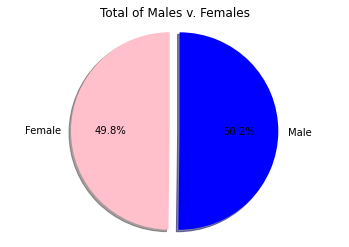

In [23]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [female_tot, male_tot]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Total of Males v. Females')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Gender_Tot_pyplot_pie.png")
plt.show()


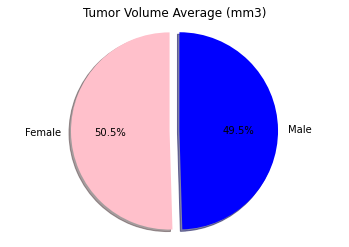

In [24]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [gender_mean_clean_table['Tumor Volume Average (mm3)'][0], gender_mean_clean_table['Tumor Volume Average (mm3)'][1]]

# The colors of each section of the pie chart
colors = ["pink", "blue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title('Tumor Volume Average (mm3)')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Gender_Avg_Tumor_pyplot_pie.png")
plt.show()

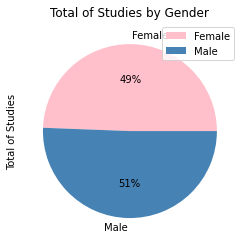

In [25]:
gender_sum_clean_table.plot(kind='pie', y='Total of Studies', autopct='%1.0f%%',
                                colors = ['pink', 'steelblue'],
                                title='Total of Studies by Gender')

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Total_Studies_pandas_pie.png")
plt.show()

# Quartiles, Outliers and Boxplots

#### Graph of All Drugs together (without Legend)

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

max_four_drug_df = merge_df.groupby(['Drug Regimen','Mouse ID', 'Tumor Volume (mm3)'], as_index=False).agg({
    'Timepoint':'max',
    })

max_four_drug_df

# Prints out the index of 'Drugs Regimen' to put it in our bar chart
list_four_drugs = max_four_drug_df['Drug Regimen'].value_counts()
list_four_drugs = list_four_drugs.index.tolist()
list_four_drugs
# prints out ['Placebo','Ketapril','Naftisol','Ceftamin','Capomulin','Zoniferol','Propriva','Infubinol','Ramicane','Stelasyn']

#'capomulin' drug
# In the data, it finds the string 'Capomulin' in the column 'Drug Regimen' then it seperates itself 
capomulin_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Capomulin", :]

capomulin_max_volume_mice = capomulin_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_capomulin = capomulin_only[capomulin_only['Timepoint']==capomulin_only['Timepoint'].max()]
maximum_of_capomulin

# 'ramicane' drug
ramicane_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Ramicane", :]

ramicane_max_volume_mice = ramicane_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_ramicane = ramicane_only[ramicane_only['Timepoint']==ramicane_only['Timepoint'].max()]
maximum_of_ramicane

# 'infubinol' drug
infubinol_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Infubinol", :]

infubinol_max_volume_mice = infubinol_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_infubinol = infubinol_only[infubinol_only['Timepoint']==infubinol_only['Timepoint'].max()]
maximum_of_infubinol

# 'ceftamin' drug
ceftamin_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Ceftamin", :]

ceftamin_max_volume_mice = ceftamin_only.groupby(['Drug Regimen','Mouse ID'])['Tumor Volume (mm3)'].max()
maximum_of_ceftamin = ceftamin_only[ceftamin_only['Timepoint']==ceftamin_only['Timepoint'].max()]
maximum_of_ceftamin


,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
239,Ceftamin,a275,62.999356,45
269,Ceftamin,j296,61.849023,45
279,Ceftamin,k210,68.923185,45
289,Ceftamin,l471,67.748662,45
309,Ceftamin,l661,59.851956,45
319,Ceftamin,l733,64.299830,45
329,Ceftamin,o287,59.741901,45
339,Ceftamin,p438,61.433892,45
366,Ceftamin,w151,67.527482,45
377,Ceftamin,x581,64.634949,45


In [27]:
# Merge the dataframes without losing its values...also it hsa the same columns... basically merge without changing any values or columns
merged_four_drugs = pd.concat([maximum_of_capomulin, maximum_of_ramicane, maximum_of_infubinol, maximum_of_ceftamin], axis=0)
merged_four_drugs

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
2,Capomulin,b128,38.982878,45
13,Capomulin,b742,38.939633,45
26,Capomulin,g288,37.074024,45
35,Capomulin,g316,40.159220,45
54,Capomulin,i557,47.685963,45
...,...,...,...,...
366,Ceftamin,w151,67.527482,45
377,Ceftamin,x581,64.634949,45
387,Ceftamin,x822,61.386660,45
397,Ceftamin,y769,68.594745,45


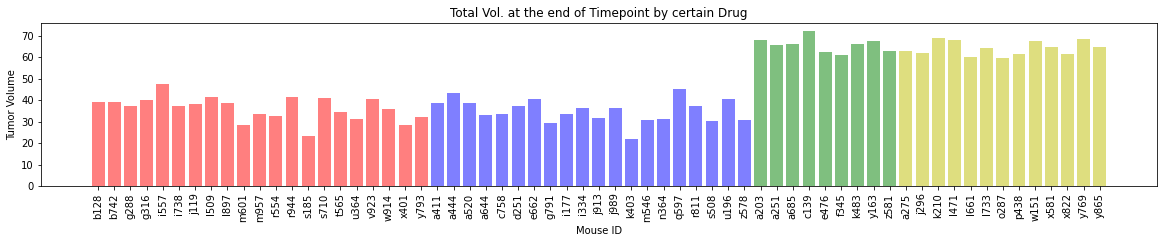

In [28]:
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Set x axis and tick locations
x_axis = np.arange(len(merged_four_drugs))
tick_locations = [value for value in x_axis]
colors = {'Capomulin': 'r', 'Ramicane': 'b', 'Infubinol': 'g', 'Ceftamin': 'y'}

# Create a list indicating where to write x labels and set figure size to adjust for space

plt.figure(figsize=(20,3))
plt.bar(x_axis, merged_four_drugs["Tumor Volume (mm3)"], color=[colors[i] for i in merged_four_drugs['Drug Regimen']], alpha=0.5, align="center")
# plt.legend(['Capomulin','Ramicane','Infubinol','Ceftamin'])

plt.xticks(tick_locations, merged_four_drugs["Mouse ID"], rotation="vertical")

plt.title('Total Vol. at the end of Timepoint by certain Drug')
plt.xlabel('Mouse ID')
plt.ylabel('Tumor Volume')

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/Four_Drugs_Tot_pyplot_bar.png")
plt.show()

#### Capomulin Drug Chart of Tumor Volume

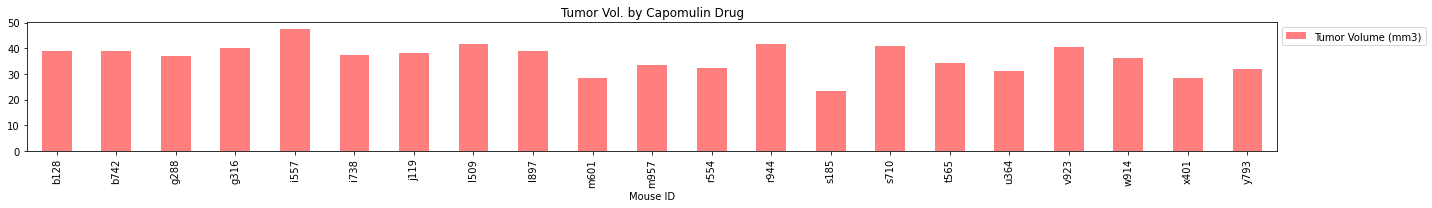

In [29]:
maximum_of_capomulin.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
capomulin_graph = maximum_of_capomulin[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
capomulin_graph = capomulin_graph.set_index("Mouse ID")

capomulin_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
capomulin_graph.plot(kind="bar", color='r', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Capomulin Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Capomulin_Drug.png")


#### Ramicane Drug Chart of Tumor Volume

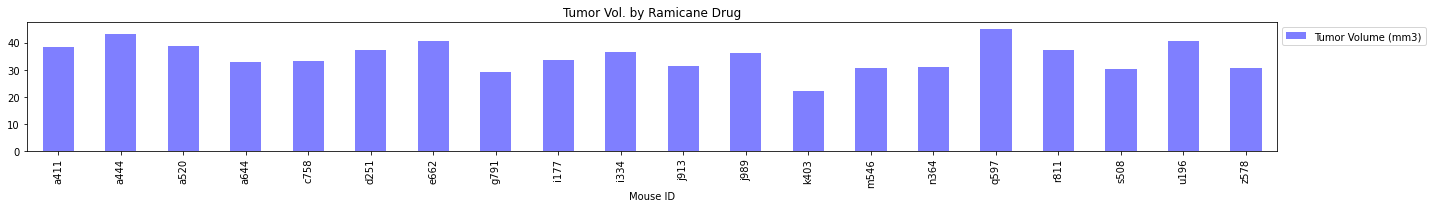

In [30]:
maximum_of_ramicane.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
ramicane_graph = maximum_of_ramicane[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
ramicane_graph = ramicane_graph.set_index("Mouse ID")

ramicane_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
ramicane_graph.plot(kind="bar", color='b', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Ramicane Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Ramicane_Drug.png")

#### Infubinol Drug Chart of Tumor Volume

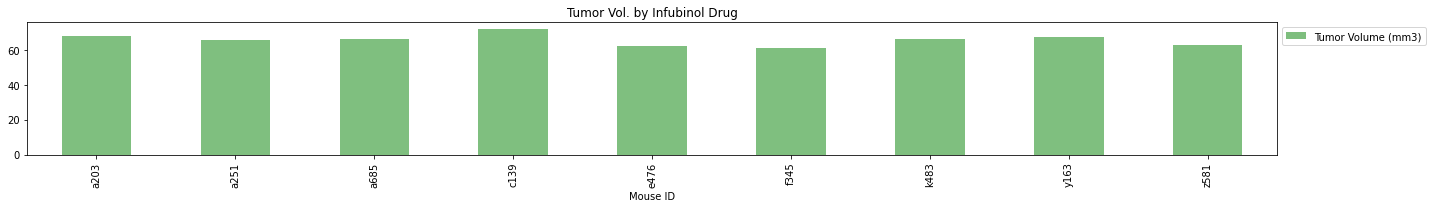

In [31]:
maximum_of_infubinol.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
infubinol_graph = maximum_of_infubinol[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
infubinol_graph = infubinol_graph.set_index("Mouse ID")

infubinol_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
infubinol_graph.plot(kind="bar", color='g', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Infubinol Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Infubinol_Drug.png")

#### Ceftamin Drug Chart of Tumor Volume

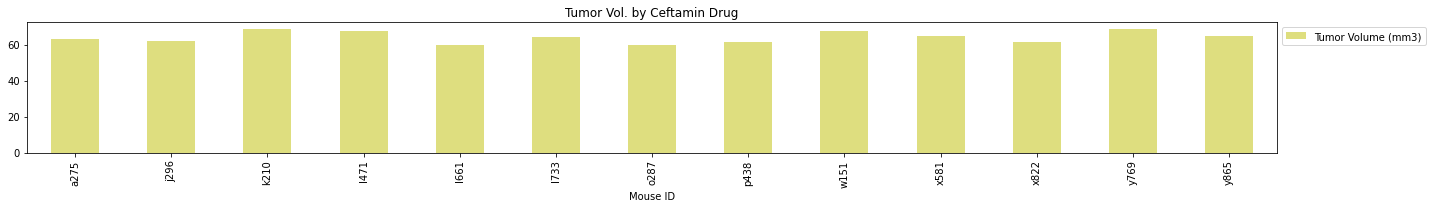

In [32]:
maximum_of_ceftamin.set_index('Mouse ID')

# Filter the DataFrame down only to those columns to chart
ceftamin_graph = maximum_of_ceftamin[["Mouse ID","Tumor Volume (mm3)"]]

# Set the index to be "State" so they will be used as labels
ceftamin_graph = ceftamin_graph.set_index("Mouse ID")

ceftamin_graph.head()

# Use DataFrame.plot() in order to create a bar chart of the data
ceftamin_graph.plot(kind="bar", color='y', alpha=0.5, figsize=(20,3))

# Set a title for the chart
plt.title("Tumor Vol. by Ceftamin Drug")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()

# Save an image of the chart and print it to the screen
plt.savefig("Images/Ceftamin_Drug.png")

#### Box Plot

In [56]:
drug_col = merged_four_drugs['Tumor Volume (mm3)']
drug_col
reset_merged_four_drugs = merged_four_drugs.reset_index(drop=True)
reset_merged_four_drugs

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Capomulin,b128,38.982878,45
1,Capomulin,b742,38.939633,45
2,Capomulin,g288,37.074024,45
3,Capomulin,g316,40.159220,45
4,Capomulin,i557,47.685963,45
...,...,...,...,...
58,Ceftamin,w151,67.527482,45
59,Ceftamin,x581,64.634949,45
60,Ceftamin,x822,61.386660,45
61,Ceftamin,y769,68.594745,45


In [57]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
four_last_tumor = reset_merged_four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)

# View the groupby dataframe
four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128                38.98
             b742                38.94
             g288                37.07
             g316                40.16
             i557                47.69
...                                ...
Ramicane     q597                45.22
             r811                37.23
             s508                30.28
             u196                40.67
             z578                30.64

[63 rows x 1 columns]

In [77]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_unstack.head()

# Create an empty list
drug_dropped = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in treatment_list:
    drug_dropped.append(list(four_last_tumor_unstack[drug].dropna()))

drug_dropped

[[38.98,
  38.94,
  37.07,
  40.16,
  47.69,
  37.31,
  38.13,
  41.48,
  38.85,
  28.43,
  33.33,
  32.38,
  41.58,
  23.34,
  40.73,
  34.46,
  31.02,
  40.66,
  36.04,
  28.48,
  31.9],
 [38.41,
  43.05,
  38.81,
  32.98,
  33.4,
  37.31,
  40.66,
  29.13,
  33.56,
  36.37,
  31.56,
  36.13,
  22.05,
  30.56,
  31.1,
  45.22,
  37.23,
  30.28,
  40.67,
  30.64],
 [67.97, 65.53, 66.08, 72.23, 62.44, 60.92, 66.2, 67.69, 62.75],
 [63.0,
  61.85,
  68.92,
  67.75,
  59.85,
  64.3,
  59.74,
  61.43,
  67.53,
  64.63,
  61.39,
  68.59,
  64.73]]

In [90]:
x_tick_values = len(treatment_list)
x_tick_values
[*range(1,x_tick_values + 1)]

[1, 2, 3, 4]

 -  -  -  -  -  -  -  -  -  - 
Capomulin IQR data:
Lower Quartile: 32.38
Upper Quartile: 40.16
Interquartile: 7.78
Median: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
__________
 -  -  -  -  -  -  -  -  -  - 
Ramicane IQR data:
Lower Quartile: 30.99
Upper Quartile: 38.51
Interquartile: 7.52
Median: 34.84 
Values below 19.71 could be outliers.
Values above 49.79 could be outliers.
__________
 -  -  -  -  -  -  -  -  -  - 
Infubinol IQR data:
Lower Quartile: 62.75
Upper Quartile: 67.69
Interquartile: 4.94
Median: 66.08 
Values below 55.34 could be outliers.
Values above 75.1 could be outliers.
__________
 -  -  -  -  -  -  -  -  -  - 
Ceftamin IQR data:
Lower Quartile: 61.43
Upper Quartile: 67.53
Interquartile: 6.1
Median: 64.3 
Values below 52.28 could be outliers.
Values above 76.68 could be outliers.
__________


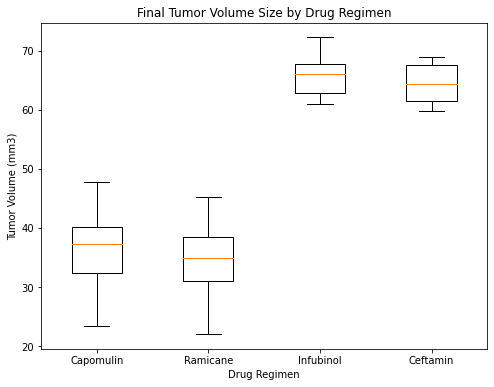

In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Do quartile calculations for each drug
for drug in treatment_list:

    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)

    lowerq = quartiles[0.25].round(2)

    upperq = quartiles[0.75].round(2)

    iqr = round(upperq - lowerq, 2)

    lower_bound = lowerq - (1.5 * iqr)
    lower_bound_rd = round(lower_bound,2)

    upper_bound = upperq + (1.5 * iqr)
    upper_bound_rd = round(upper_bound,2)


    

    print(" - " * 10)
    print(f"{drug} IQR data:")

    print(f"Lower Quartile: {lowerq}")

    print(f"Upper Quartile: {upperq}")

    print(f"Interquartile: {iqr}")

    print(f"Median: {quartiles[0.5]} ")

    print(f"Values below {lower_bound_rd} could be outliers.")

    print(f"Values above {upper_bound_rd} could be outliers.")
    print(f"_" * 10)

# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(8,6))
ax.set_title('Final Tumor Volume Size by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(drug_dropped,notch=0,sym='gD')
# will find how many values
x_tick_values = len(treatment_list)
x_tick_values = [*range(1,x_tick_values + 1)]
plt.xticks(x_tick_values,treatment_list)

# Save the figure
plt.savefig("Images/FourDrugBoxPlot.png")

# show figure
plt.show()

 -  -  -  -  -  -  -  -  -  - 
Capomulin IQR data:
Lower Quartile: 32.38
Upper Quartile: 40.16
Interquartile: 7.78
Median: 37.31 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
__________
 -  -  -  -  -  -  -  -  -  - 
Ramicane IQR data:
Lower Quartile: 30.99
Upper Quartile: 38.51
Interquartile: 7.52
Median: 34.84 
Values below 19.71 could be outliers.
Values above 49.79 could be outliers.
__________
 -  -  -  -  -  -  -  -  -  - 
Infubinol IQR data:
Lower Quartile: 62.75
Upper Quartile: 67.69
Interquartile: 4.94
Median: 66.08 
Values below 55.34 could be outliers.
Values above 75.1 could be outliers.
__________
 -  -  -  -  -  -  -  -  -  - 
Ceftamin IQR data:
Lower Quartile: 61.43
Upper Quartile: 67.53
Interquartile: 6.1
Median: 64.3 
Values below 52.28 could be outliers.
Values above 76.68 could be outliers.
__________


In [34]:

# fig1, ax1 = plt.subplots()
# ax1.set_title('Tumor Volume of each Drug')
# ax1.set_ylabel('Tumor Volume (mm3)')
# ax1.boxplot(drug_col)

# # Save an image of the chart and print it to the screen
# plt.savefig("Images/Four_Drug_boxplot.png")

# # If the data is in a dataframe, we use pandas to give quartile calculations
# quartiles = drug_col.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of tumor volume is: {lowerq}")
# print(f"The upper quartile of tumor volume is: {upperq}")
# print(f"The interquartile range of tumor volume is: {iqr}")
# print(f"The the median of tumor volume is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


<Figure size 432x288 with 0 Axes>

In [35]:
# Merge two dataframes using an inner join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# # Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
clean_study_data_complete

timepoint_maximum_table = clean_study_data_complete.groupby(['Mouse ID'], as_index=False).agg({
    'Timepoint':'max'
    })

timepoint_maximum_table

# merged maximum timepoint values only with origin values with the maximum timepoint 
timepoint_maximum_table = timepoint_maximum_table.merge(clean_study_data_complete,on=['Mouse ID','Timepoint'],how="left")
timepoint_maximum_table

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# drug_regimen is a string, and treatment_list has a list of the drugs we want...
# Drug_regimen is going to go by each word... first it chooses 'Capomulin'... once done it will go the next word
for drug_regimen in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #                                             find the word of each string...first is 'Capomulin' so it wil find that first
    #                                                         once it finds a drug involve with Capomulin, it will find its tumor volume at timepoint max
    final_volume = timepoint_maximum_table.loc[timepoint_maximum_table["Drug Regimen"] == drug_regimen, 'Tumor Volume (mm3)']
    
    # Add's the value of the final tumor volume depending on the drug_regimen  
    tumor_list.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Outliers input here
    
    # outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]

    # print(f"{drug_regimen}'s potential outliers: {outliers}")


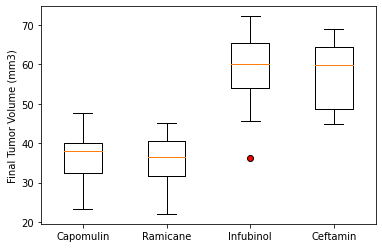

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='r')
plt.boxplot(tumor_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

#### Scatter Plots

In [95]:
capomulin_only

,Drug Regimen,Mouse ID,Tumor Volume (mm3),Timepoint
0,Capomulin,b128,37.967644,35
1,Capomulin,b128,38.379726,40
2,Capomulin,b128,38.982878,45
3,Capomulin,b128,40.605335,30
4,Capomulin,b128,42.731552,20
...,...,...,...,...
225,Capomulin,y793,40.716428,20
226,Capomulin,y793,41.019913,5
227,Capomulin,y793,41.630010,10
228,Capomulin,y793,42.283665,15


In [98]:
# max_four_drug_df = merge_df.groupby(['Drug Regimen','Mouse ID', 'Tumor Volume (mm3)','Weight (g)'], as_index=False).agg({
#     'Timepoint':'max',
#     })

# merge_df

#'capomulin' drug
# In the data, it finds the string 'Capomulin' in the column 'Drug Regimen' then it seperates itself 
capomulin_only = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]
capomulin_only



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [102]:
# get the mean of weight and tumor volume by applying .agg formula
capomulin_scatter_outcome = capomulin_only.groupby(['Mouse ID']).agg(
        Mouse_weight=('Weight (g)', np.mean),
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)
).round(2)
capomulin_scatter_outcome

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.96
b742,21,40.08
f966,17,36.51
g288,19,41.99
g316,22,44.61
i557,24,44.81
i738,20,39.14
j119,23,44.47
j246,21,43.22


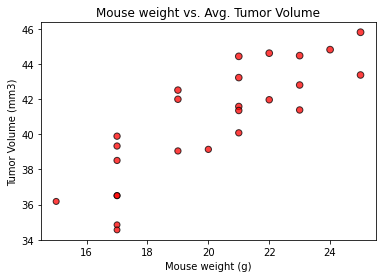

In [103]:
# Scatter plot of the data frame above... capomulin only!
plt.scatter(
    capomulin_scatter_outcome['Mouse_weight'],
    capomulin_scatter_outcome['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=capomulin_scatter_outcome['Tumor_vol_mean'],
    alpha=.75)

# LABELS!
# title
plt.title("Mouse weight vs. Avg. Tumor Volume")

# x label
plt.xlabel("Mouse weight (g)")

# y label
plt.ylabel("Tumor Volume (mm3)")

# Save the figure
plt.savefig("Images/Scatter_Plot_Weight_Vs_TumorVol.png")

plt.show()

In [104]:
# tumor_avg = sum_tumor['Tumor Volume Mean']
# weight_mouse = mice_agg['Weight (g)']
# sum_tumor
# mice_agg
# plt.scatter(weight_mouse, tumor_avg, marker="o", facecolors="red", edgecolors="black")

# # Create a title, x label, and y label for our chart
# plt.title("Tumor Volume Avg v Weight of Mouse")
# plt.xlabel("Weight of Mouse")
# plt.ylabel("Tumor Vol. Avg")

# plt.savefig("Images/TumorVolAvg_WghtMouse_ScatterPlot.png")
# plt.show()

#### Line Plot

In [106]:
capomulin_only = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]
capomulin_only

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [108]:
# get the mean of weight and tumor volume by applying .agg formula
capomulin_lineplot_outcome = capomulin_only.groupby(['Timepoint']).agg(
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),
        Tumor_Vol_SEM=('Tumor Volume (mm3)', sts.sem)
).round(2)

capomulin_lineplot_outcome

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.00,0.00
5,44.27,0.45
10,43.08,0.70
15,42.06,0.84
20,40.72,0.91
25,39.94,0.88
30,38.77,0.93
35,37.82,1.05
40,36.96,1.22


In [118]:
reset_capomulin_lineplot_outcome = capomulin_lineplot_outcome.reset_index()
campomulin_timepoint_values = reset_capomulin_lineplot_outcome['Timepoint']
x_values = list(campomulin_timepoint_values)
x_values

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

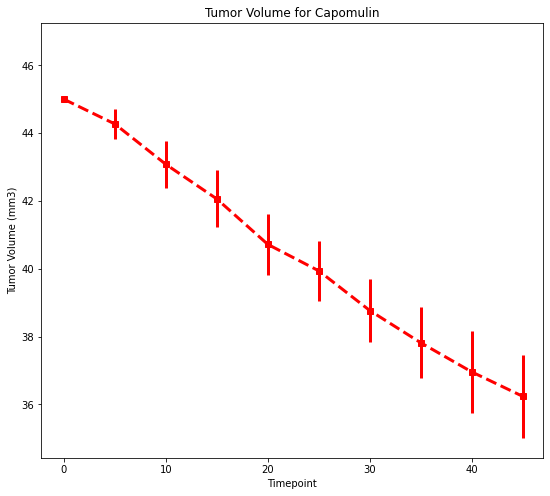

In [130]:

# Use errorbar plot from matplotlib
plt.errorbar(
    # X Values/label
    x_values, 
    # Y Values/label
    capomulin_lineplot_outcome['Tumor_Vol_Mean'], 
    # Y Error's
    yerr=capomulin_lineplot_outcome['Tumor_Vol_SEM'], 
    # Title    
    label="Tumor Volume for Capomulin",
    fmt="rs--", 
    linewidth=3  
    )
# LABELS FOR CHART
# title
plt.title("Tumor Volume for Capomulin")

# x label
plt.xlabel("Timepoint")

# y label
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.ylim(min(capomulin_lineplot_outcome['Tumor_Vol_Mean'])*0.95, max(capomulin_lineplot_outcome['Tumor_Vol_Mean'])*1.05)

plt.xlim(min(x_values) - max(x_values)*(5/100), max(x_values) + 2)

# For Github sizing
plt.rcParams["figure.figsize"] = [9,8]

# Save the figure
plt.savefig("Images/Capomulin_Line_Chart_Plot_WITH_REG_LINE.png")

# plot show
plt.show()

In [131]:
# max_four_drug_df['Drug Regimen']
# capomulin_only = max_four_drug_df.loc[max_four_drug_df["Drug Regimen"] == "Capomulin", :]

# cap_tumor_vol = capomulin_only[['Tumor Volume (mm3)','Mouse ID']]
# cap_timepoint = capomulin_only[['Timepoint','Mouse ID']]
# cap_tumor_timepoint = capomulin_only[['Timepoint','Tumor Volume (mm3)','Mouse ID']]


# cap_tumor_vol.set_index('Mouse ID')
# cap_timepoint.set_index('Mouse ID')

# cap_tumor_timepoint = cap_tumor_timepoint.set_index('Mouse ID')
# lines = cap_tumor_timepoint.plot.line()
# cap_tumor_timepoint


In [139]:
# Find the correlation between the two variables
correlation = sts.pearsonr(capomulin_scatter_outcome['Mouse_weight'],capomulin_scatter_outcome['Tumor_vol_mean'])
print(correlation)
correlation_rd = round(correlation[0],2)
second_val = correlation[1]
print(f"Correlation between both factors: {correlation_rd}")
print(f"Second Val: {second_val}")

# Get the x values
x_values = capomulin_scatter_outcome['Mouse_weight']

# Get the y values
y_values = capomulin_scatter_outcome['Tumor_vol_mean']

# Apply formula to get the linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Get the slope formula
slope = str(round(slope,2))
intercept = str(round(intercept,2))
line_eq = (f"y = {slope}x + {intercept}")

print(line_eq)

(0.8418558779004005, 1.3297811707246175e-07)
Correlation between both factors: 0.84
Second Val: 1.3297811707246175e-07
y = 0.95x + 21.56


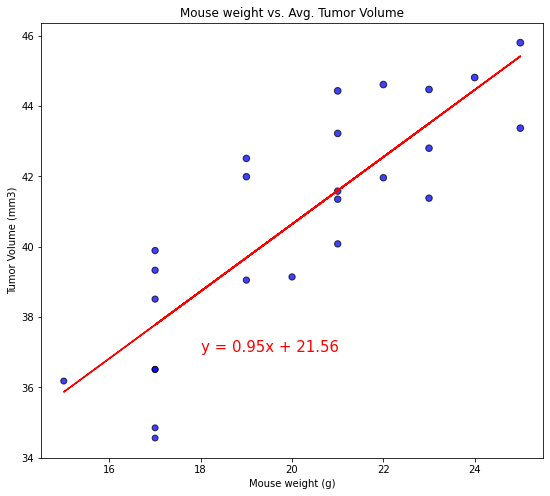

In [145]:
# Scatter plot of the data frame above... capomulin only!
plt.scatter(
    capomulin_scatter_outcome['Mouse_weight'],
    capomulin_scatter_outcome['Tumor_vol_mean'],
    marker='o',
    facecolors='b',
    edgecolors='black',
    s=capomulin_scatter_outcome['Tumor_vol_mean'],
    alpha=.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="r")
# LABELS!
# title
plt.title("Mouse weight vs. Avg. Tumor Volume")

# x label
plt.xlabel("Mouse weight (g)")

# y label
plt.ylabel("Tumor Volume (mm3)")

# Save the figure
plt.savefig("Images/Scatter_Plot_Weight_Vs_TumorVol_WITH_REG.png")

plt.show()